# Project: Customer Personality Analysis
Course: Python Avanzado

Student: Nolverto Urías Obeso

## Content
1. Univariate Analysis
2. Correlation between variables
3. KMeans
4. Cluster Representation using PCA
5. Multivariate Analysis
6. Supervised Classification Model
7. SVM

## Description

## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


## Content
### Attributes

#### People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years


#### Promotion
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

## Target
Need to perform clustering to summarize customer segments.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import seaborn as sns
from dotenv import dotenv_values, load_dotenv
import os
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import datetime as dt
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Decission Tree Libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
import sklearn
sklearn.__version__

'1.3.0'

## Dataset

In [3]:
# 1. We Upload the dataset
df = pd.read_csv('marketing_campaign.csv')

# 2. Display the dataset
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [4]:
# Functions for this project

# display_histogram function displays an histogram and density curve for 
# Integer or Float data types
# @param string variable
def display_histogram(variable):
    
    var = str(variable)
    var_title = str(variable)

    # Matplotlib settings for the figure
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,4), sharex=True)

    # Display Histogram
    sns.histplot(data=df[var], ax=ax[0], kde=False)
    ax[0].set_xlabel(var_title)
    ax[0].set_ylabel("Frequency")

    # Display the Density Curve
    sns.kdeplot(data=df[var], ax=ax[1], fill=True)
    ax[1].set_xlabel(var_title)
    ax[1].set_ylabel('Density')

    fig.suptitle('Univariate Analysis of the ' + var_title)
    
def display_bar_chart(variable):
    var = str(variable)
    var_title = str(variable)
    
    # Matplotlib settings for the figure
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(11,4), sharex=True)
    sns.countplot(data=df, x=variable, ax=ax)
    ax.set_xlabel(var_title)
    ax.set_ylabel('Density')
    fig.suptitle('Univariate Analysis of the ' + var_title)

In [5]:
# Transforms category variable to Integer
# df['Education'].value_counts(True)
df_Education_Int = df['Education'].astype('category').cat.codes

In [6]:
# df_Education_Int.unique()

In [7]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [8]:
# Distribution for Education
df_Education_Int.value_counts(True)

2    0.503125
4    0.216964
3    0.165179
0    0.090625
1    0.024107
Name: proportion, dtype: float64

In [9]:
col_names = list(df.columns.values)
col_names = col_names[1::]
# col_names
x = df[col_names].values
print(type(x)) # <class 'numpy.ndarray'>
y = df.Year_Birth
y = y.values.tolist()
print(type(y))
print(col_names)

<class 'numpy.ndarray'>
<class 'list'>
['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [10]:
df_describe = df[col_names]
df_describe.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count       2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean          27.062946  ...           5.316518      0.072768      0.074554   
std           41.280498  ...           2.426645      0.259813      0.262728   
min            0.000000  ...           0.000000      0.000000      0.000000   
25%            1.000000  ...           3.000000      0.000000      0.000000   
50%            8.000000  ...           6.000000      0.000000      0.000000   
75%           33.000000  ...           7.000000      0.000000      0.000000   
max          263.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 25 columns]

In [ ]:
# I decided to cleanup the rows that had empty values at income column

In [11]:
df.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response'], dtype=object)

# Univariate Analysis

Variable 	 Type


C:\Users\nolve\AppData\Local\Temp\ipykernel_2260\2785379382.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11,4), sharex=True)
C:\Users\nolve\AppData\Local\Temp\ipykernel_2260\2785379382.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[var], ax=ax[1], fill=True)
C:\Users\nolve\AppData\Local\Temp\ipykernel_2260\2785379382.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[var], ax=ax[1], fill=True)


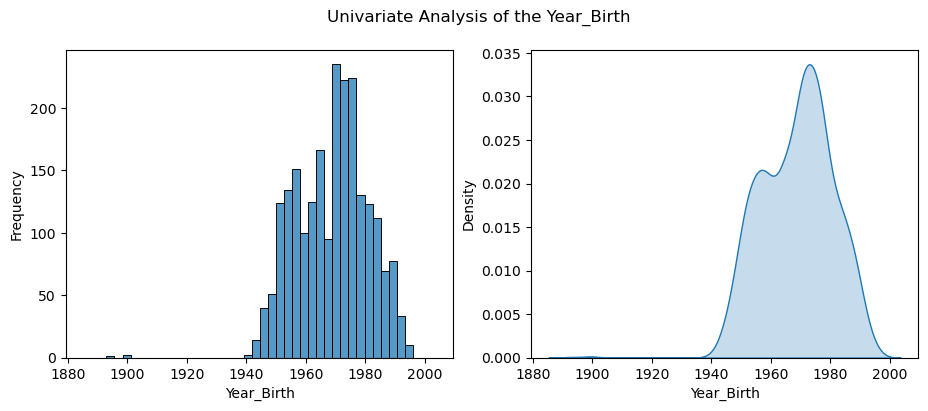

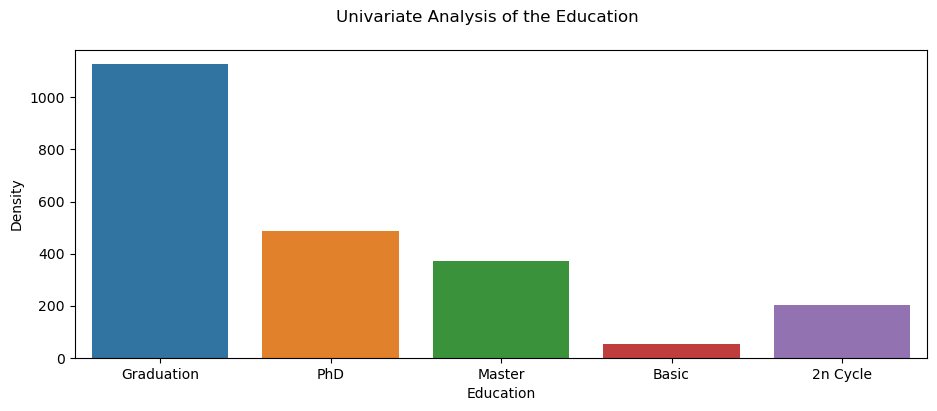

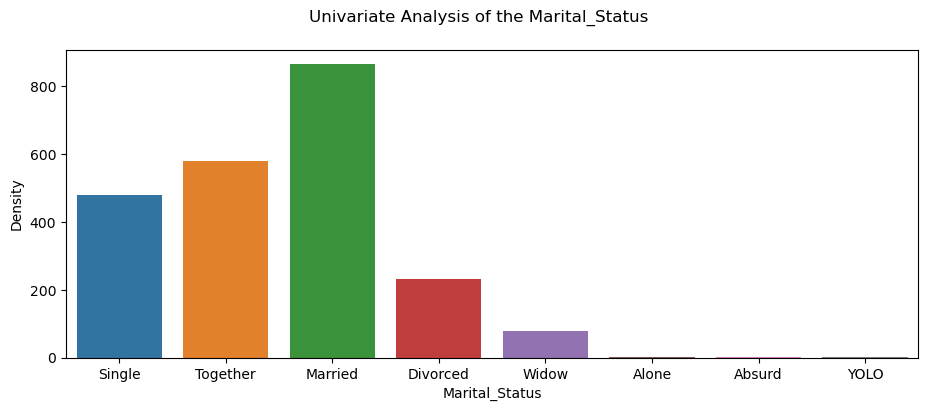

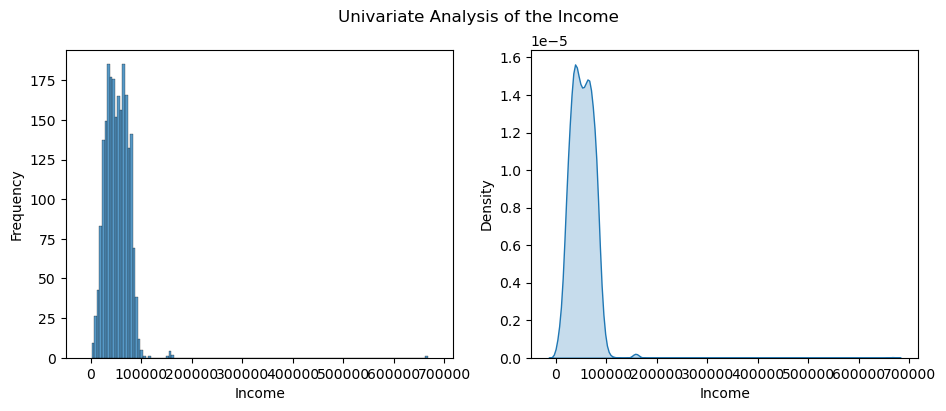

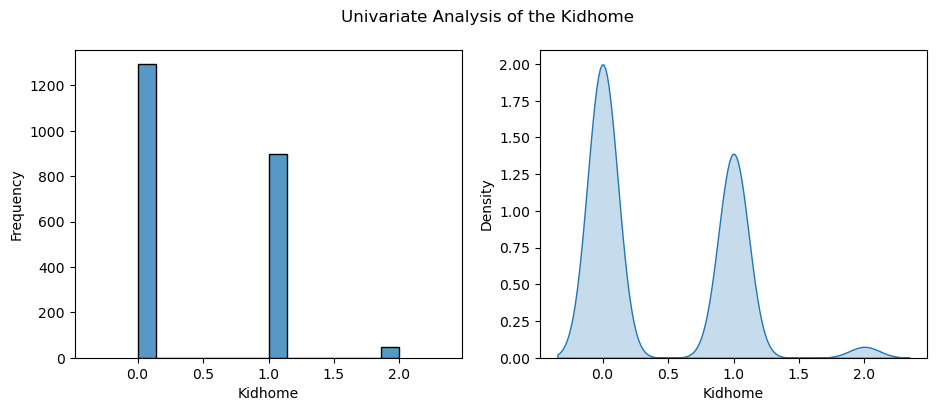

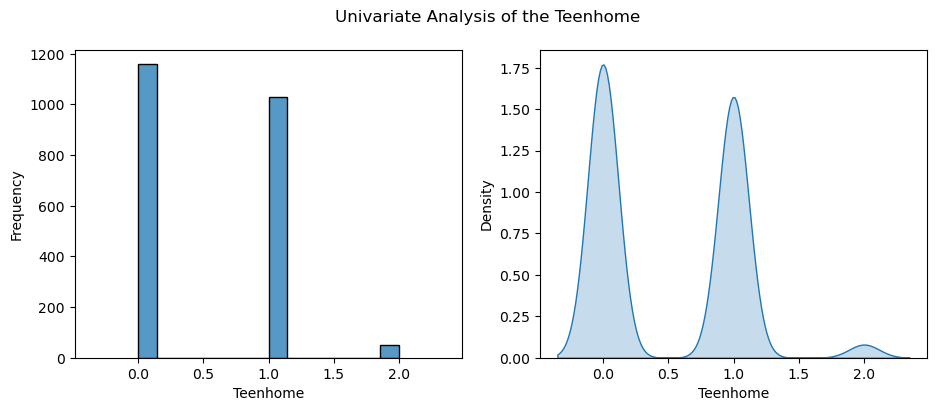

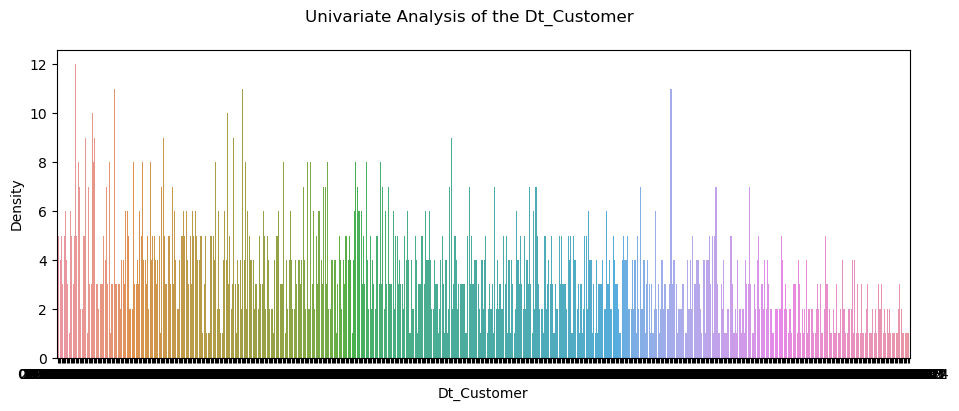

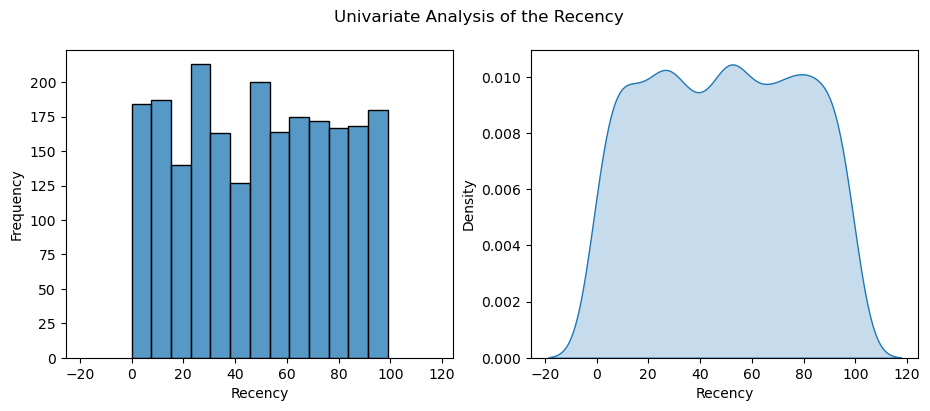

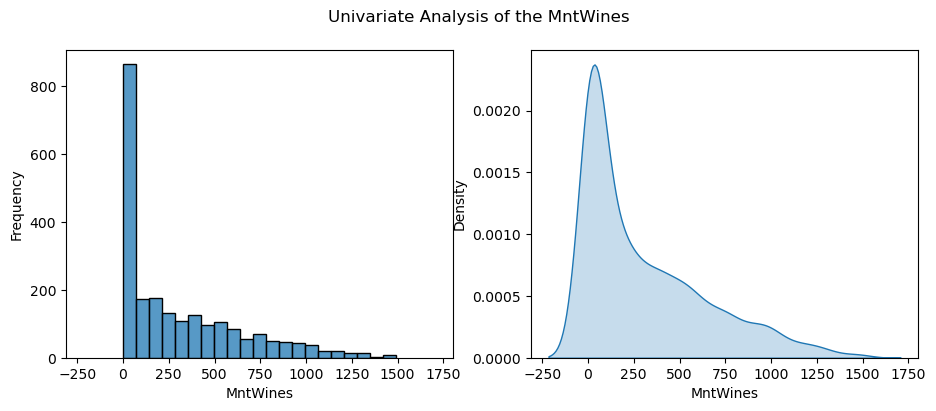

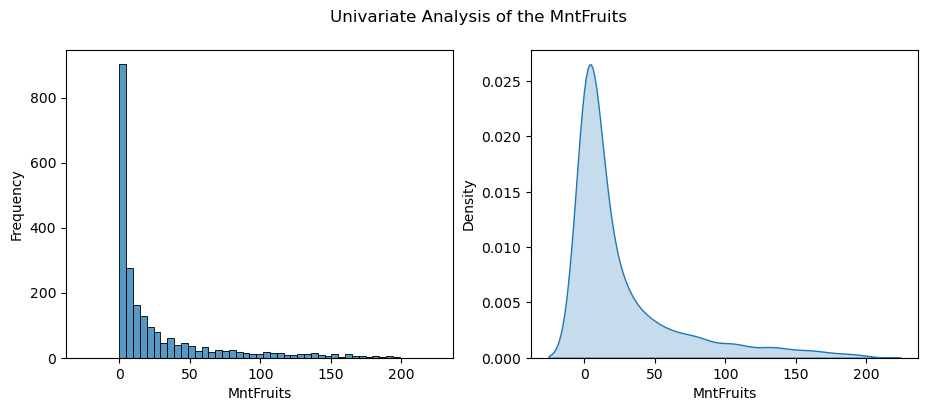

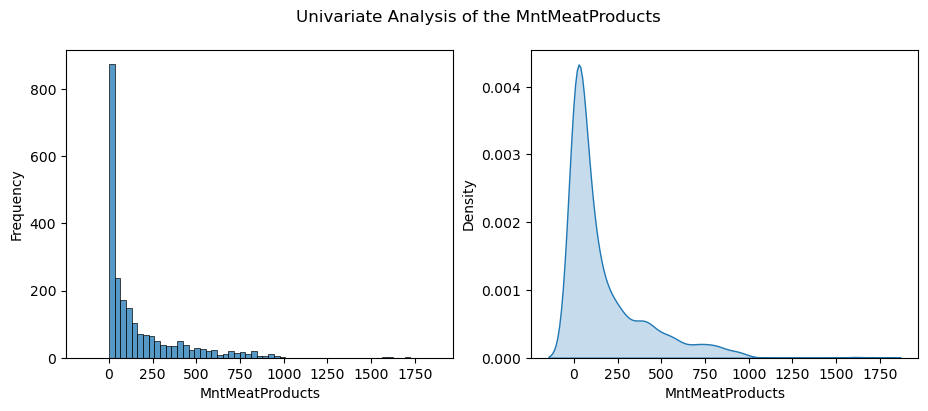

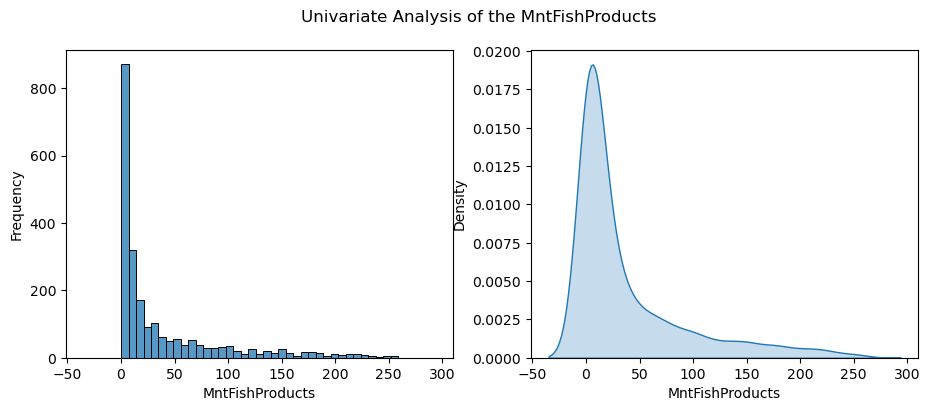

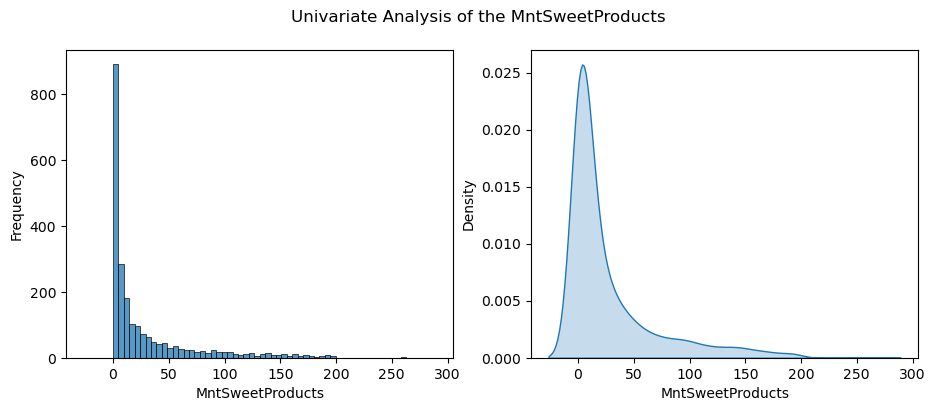

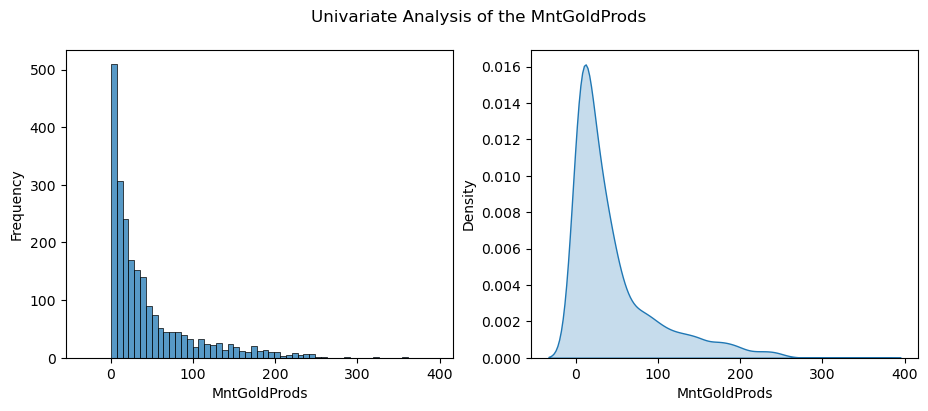

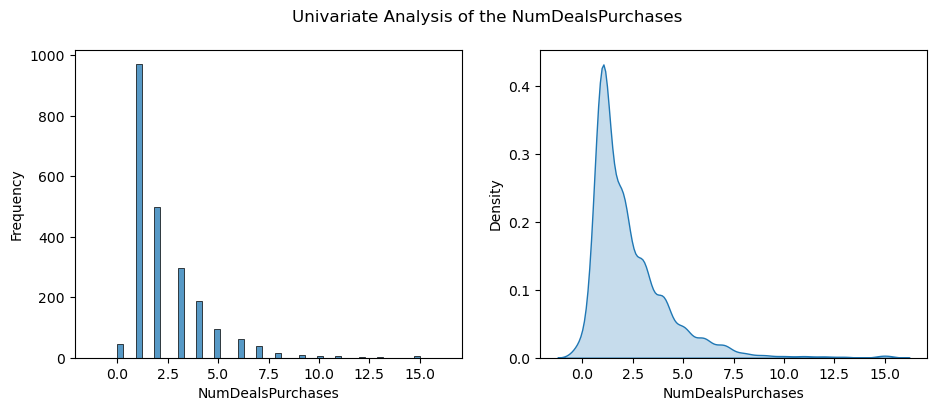

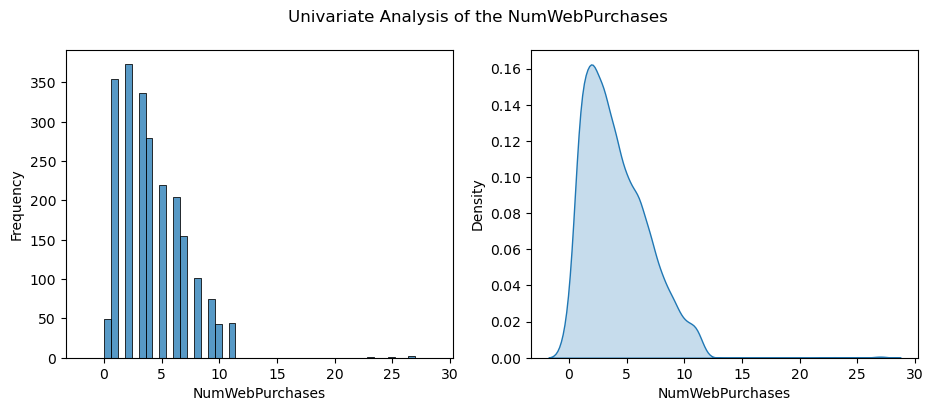

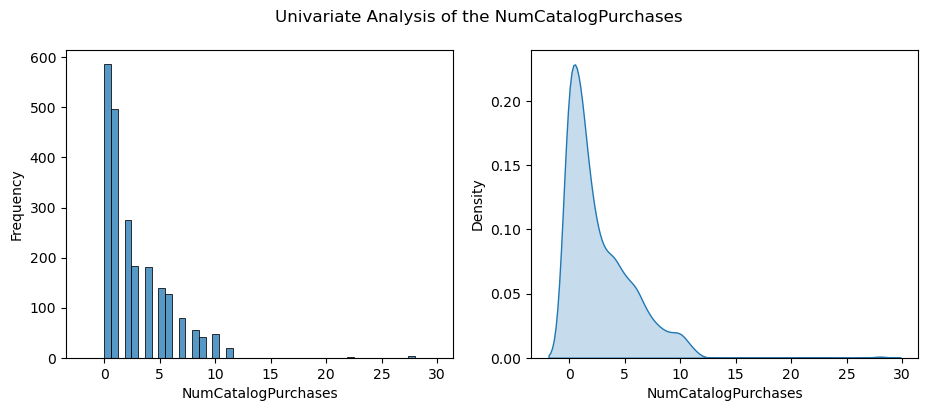

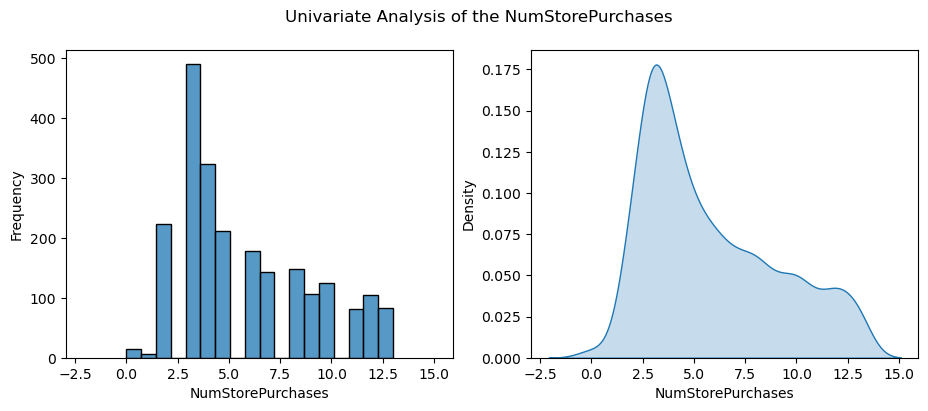

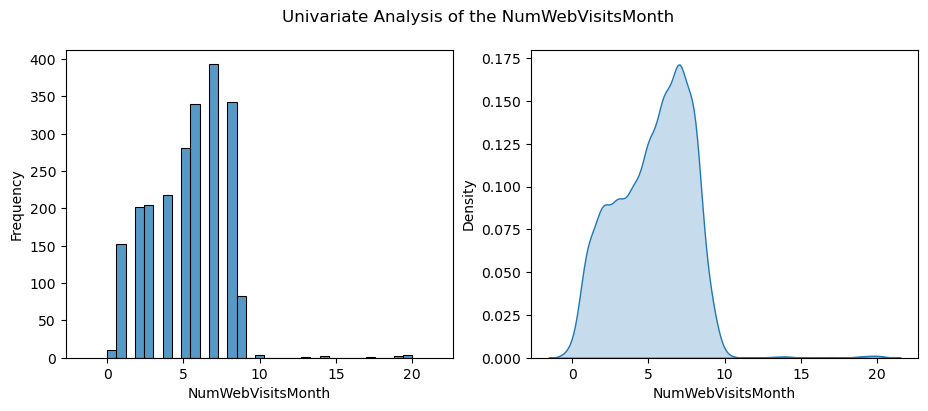

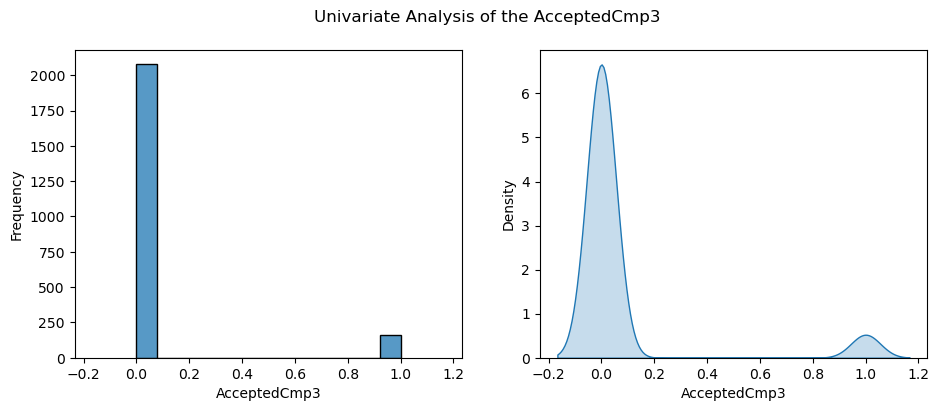

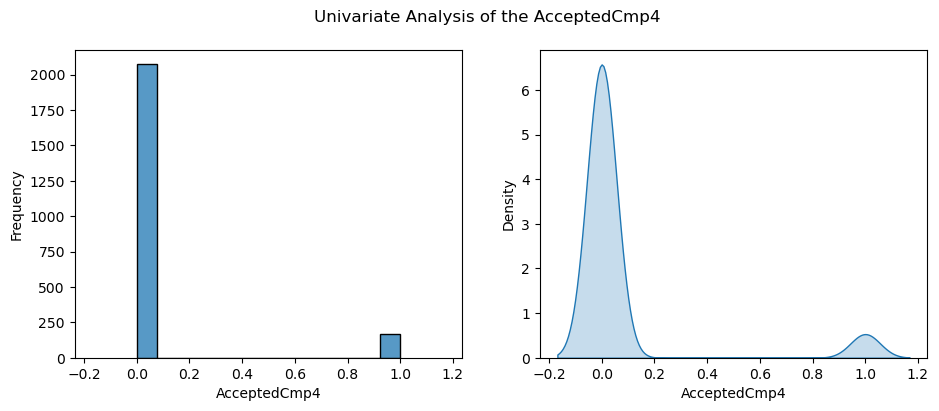

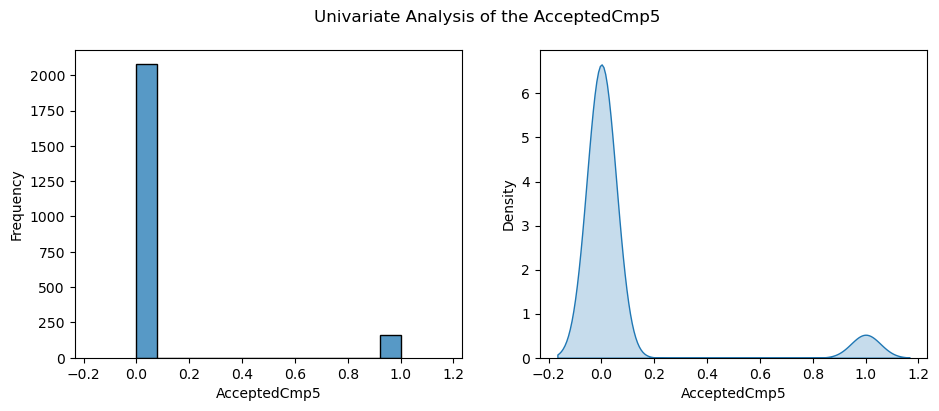

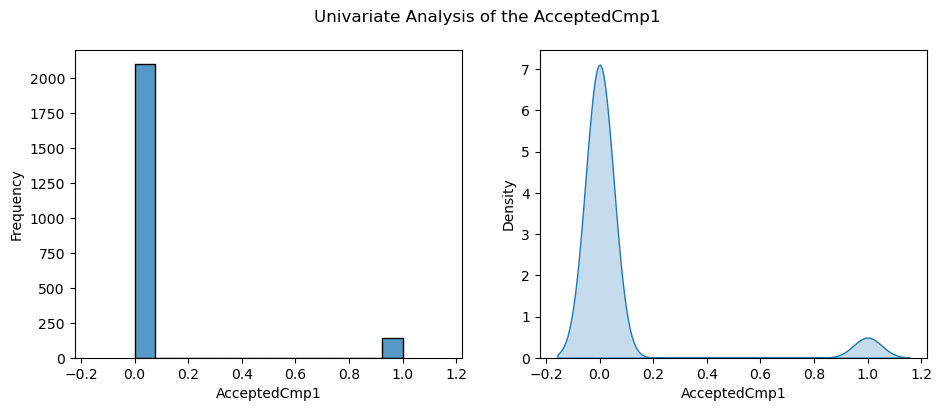

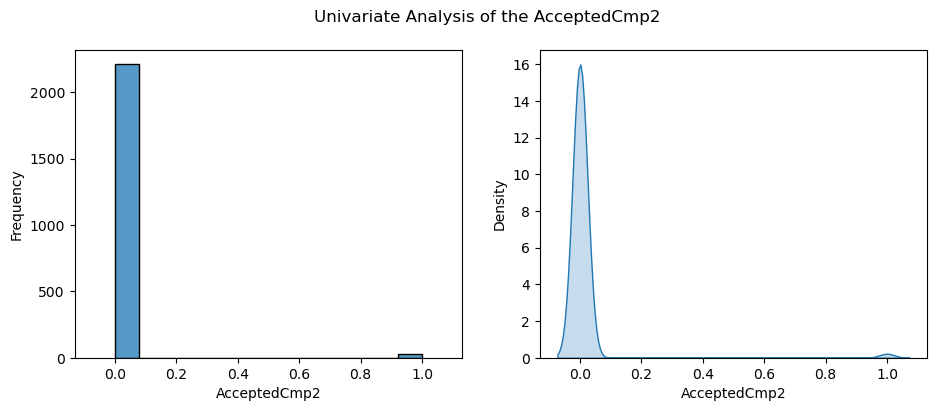

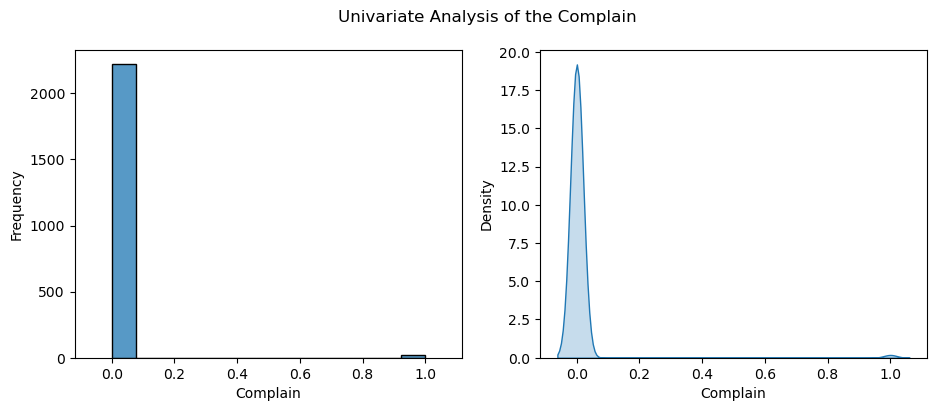

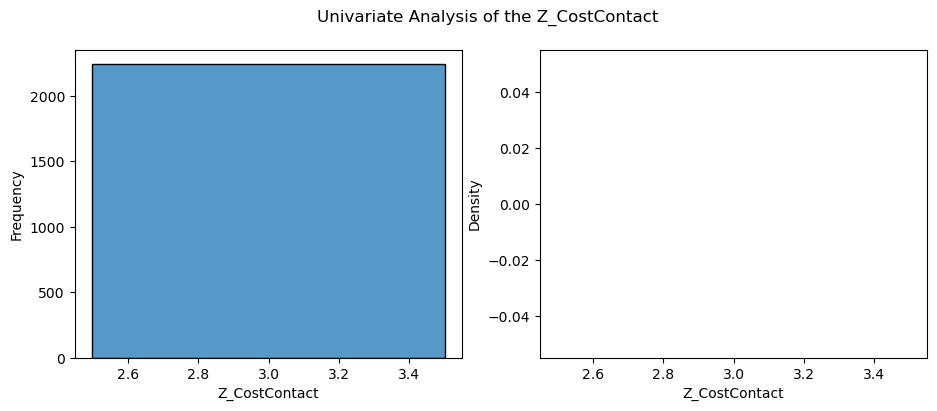

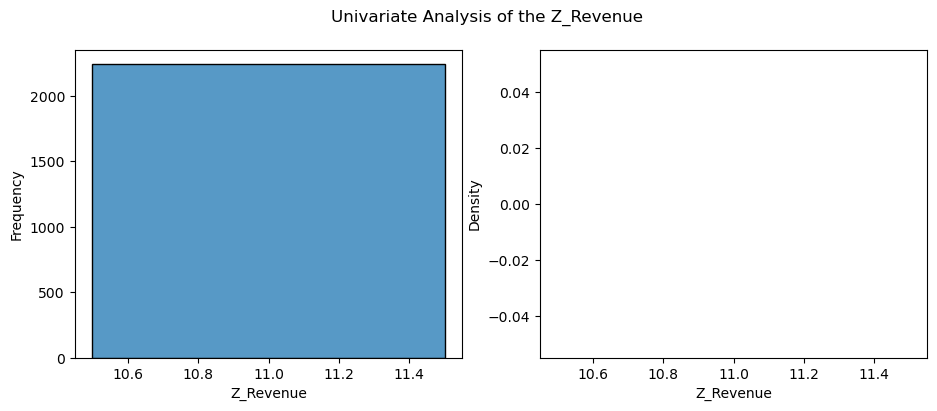

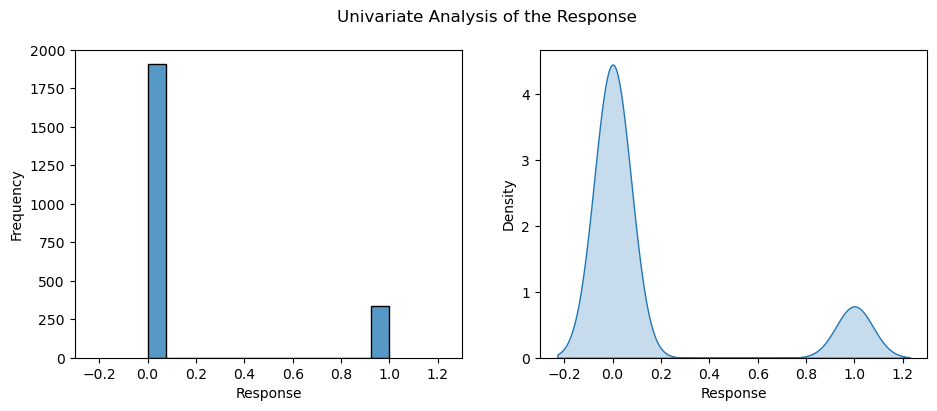

In [12]:
# First Analysis 

df_columns = df.columns.values
df_columns = df_columns[1::]

print("Variable \t Type")
for variable in df_columns:
    data_type = type(df[variable][0])
#     print(variable)
    if (data_type == str):
#         print(variable,"\t is a String Type")
#         print(df[variable].value_counts(True))
        display_bar_chart(variable)
#         print("-------------------------------------\n")
    elif (data_type == np.int64 or data_type == np.float64):
#         print("Int or float")
        display_histogram(variable)

In [ ]:
# Observations
# Year_Birth: Maybe there are Outliers (old people)
# Education: Most of the people have a title
# Marital_Status: 1/2 
# Income: 

# Note: I did not use a technique to remove outliers

In [13]:
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [14]:
# Getting customer age in the company (in years)
# Changing the datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = "%d-%M-%Y")
# df['Dt_Customer'].head()  # for debug
df['Customer_age'] = (dt.datetime.now() - df['Dt_Customer']).dt.days / 365


In [15]:
df['Dt_Customer'].head()

0   2012-01-04 00:09:00
1   2014-01-08 00:03:00
2   2013-01-21 00:08:00
3   2014-01-10 00:02:00
4   2014-01-19 00:01:00
Name: Dt_Customer, dtype: datetime64[ns]

In [16]:
df['Customer_age'].describe()

count    2240.000000
mean       10.696758
std         0.686158
min         9.682192
25%        10.682192
50%        10.723288
75%        10.761644
max        11.767123
Name: Customer_age, dtype: float64

In [17]:
# Giving a category to a String Type Values
df['Education'] = df['Education'].astype('category').cat.codes
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes
# df['Dt_Customer'] = df['Dt_Customer'].astype('category').cat.codes


In [18]:
# Using only numeric values 
colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only.remove('ID')
colnames_numerics_only

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Customer_age']

In [19]:
 # Correlation between variables (Correlation Matrix)

# Displaying Correlation Table
df_correlation = df[colnames_numerics_only]
df_correlation.corr()

Year_Birth  Education  Marital_Status    Income  \
Year_Birth             1.000000  -0.171390       -0.060580 -0.161791   
Education             -0.171390   1.000000        0.007090  0.120692   
Marital_Status        -0.060580   0.007090        1.000000  0.021353   
Income                -0.161791   0.120692        0.021353  1.000000   
Kidhome                0.230176  -0.045564       -0.022553 -0.428669   
Teenhome              -0.352111   0.118485       -0.003596  0.019133   
Recency               -0.019871  -0.011728        0.014159 -0.003970   
MntWines              -0.157773   0.197576        0.008205  0.578650   
MntFruits             -0.017917  -0.080412        0.000593  0.430842   
MntMeatProducts       -0.030872   0.033625        0.030689  0.584633   
MntFishProducts       -0.041625  -0.112223        0.035808  0.438871   
MntSweetProducts      -0.018133  -0.105217        0.017382  0.440744   
MntGoldProds          -0.061818  -0.095489        0.001688  0.325916   
NumDealsPurchases     -0.060846   0.030075       -0.021772 -0.083101   
NumWebPurchases       -0.145040   0.081908       -0.001894  0.387878   
NumCatalogPurchases   -0.121275   0.070782        0.015125  0.589162   
NumStorePurchases     -0.128272   0.070483        0.001412  0.529362   
NumWebVisitsMonth      0.121139  -0.040281       -0.031210 -0.553088   
AcceptedCmp3           0.061774   0.005836       -0.027113 -0.016174   
AcceptedCmp4          -0.060510   0.053266        0.014381  0.184400   
AcceptedCmp5           0.007123   0.033346        0.012817  0.335943   
AcceptedCmp1          -0.005930  -0.010845       -0.017097  0.276820   
AcceptedCmp2          -0.006539   0.021369        0.018417  0.087545   
Complain              -0.030128  -0.050540       -0.005718 -0.027225   
Z_CostContact               NaN        NaN             NaN       NaN   
Z_Revenue                   NaN        NaN             NaN       NaN   
Response               0.021325   0.090819       -0.011403  0.133047   
Customer_age           0.028519  -0.045961        0.018731 -0.021343   

                      Kidhome  Teenhome   Recency  MntWines  MntFruits  \
Year_Birth           0.230176 -0.352111 -0.019871 -0.157773  -0.017917   
Education           -0.045564  0.118485 -0.011728  0.197576  -0.080412   
Marital_Status      -0.022553 -0.003596  0.014159  0.008205   0.000593   
Income              -0.428669  0.019133 -0.003970  0.578650   0.430842   
Kidhome              1.000000 -0.036133  0.008827 -0.496297  -0.372581   
Teenhome            -0.036133  1.000000  0.016198  0.004846  -0.176764   
Recency              0.008827  0.016198  1.000000  0.016064  -0.004306   
MntWines            -0.496297  0.004846  0.016064  1.000000   0.389637   
MntFruits           -0.372581 -0.176764 -0.004306  0.389637   1.000000   
MntMeatProducts     -0.437129 -0.261160  0.023056  0.562667   0.543105   
MntFishProducts     -0.387644 -0.204187  0.001079  0.399753   0.594804   
MntSweetProducts    -0.370673 -0.162475  0.022670  0.386581   0.567164   
MntGoldProds        -0.349595 -0.021725  0.016693  0.387516   0.392995   
NumDealsPurchases    0.221798  0.387741 -0.001098  0.010940  -0.132114   
NumWebPurchases     -0.361647  0.155500 -0.010726  0.542265   0.296735   
NumCatalogPurchases -0.502237 -0.110769  0.025110  0.635226   0.487917   
NumStorePurchases   -0.499683  0.050695  0.000799  0.642100   0.461758   
NumWebVisitsMonth    0.447846  0.134884 -0.021445 -0.320653  -0.418383   
AcceptedCmp3         0.014674 -0.042677 -0.032991  0.062202   0.014727   
AcceptedCmp4        -0.161600  0.038886  0.018826  0.373286   0.010152   
AcceptedCmp5        -0.205634 -0.191050  0.000129  0.472613   0.215833   
AcceptedCmp1        -0.172339 -0.140090 -0.019283  0.354133   0.194748   
AcceptedCmp2        -0.081716 -0.015605 -0.001781  0.205907  -0.009773   
Complain             0.040207  0.003138  0.013231 -0.039007  -0.005166   
Z_CostContact             NaN       NaN       NaN       NaN        NaN   
Z_Revenu

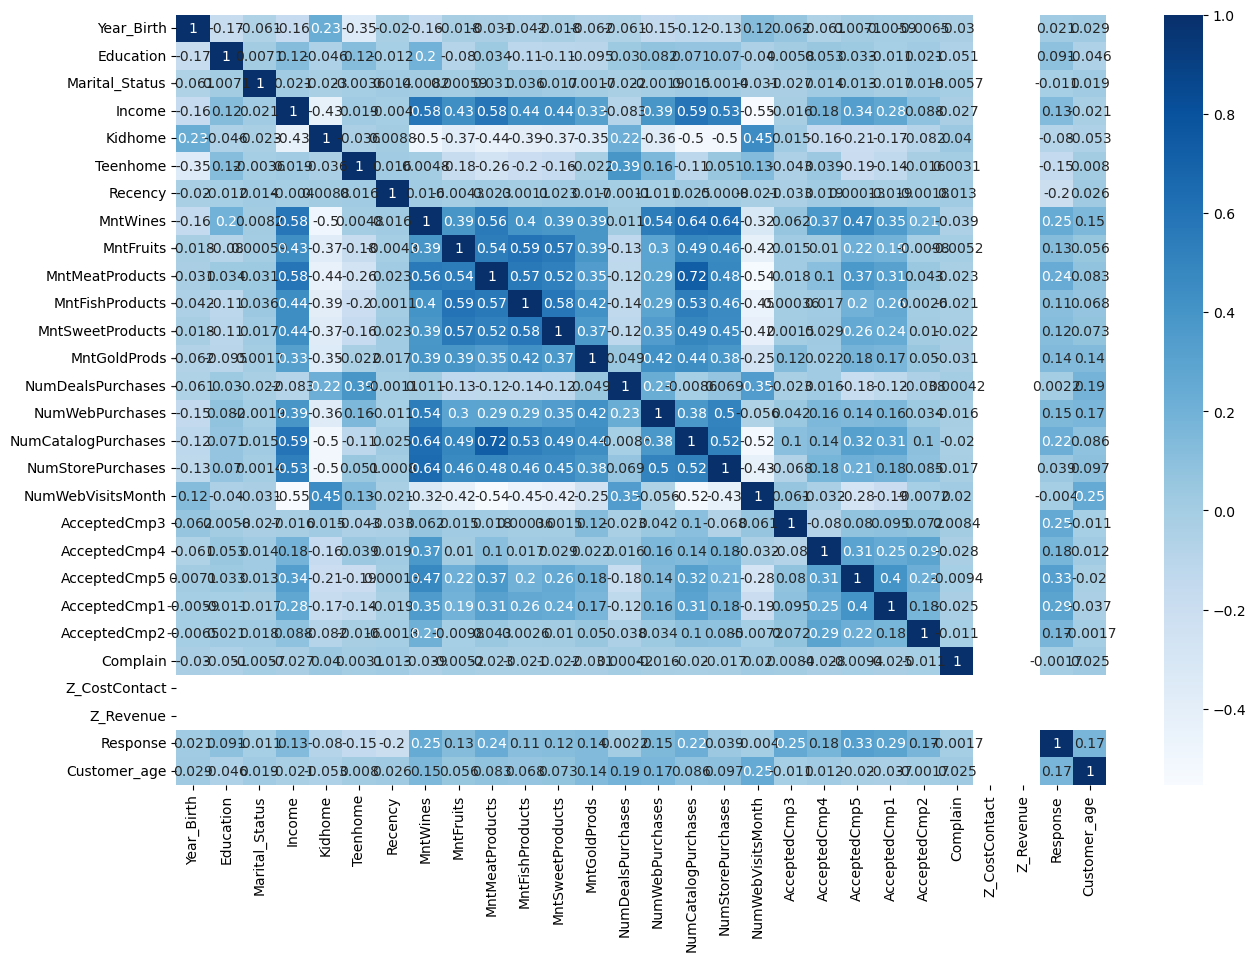

In [20]:
fig = plt.figure(figsize=(15,10))
# sns.heatmap(df_correlation.corr(), cmap='Blues'')
sns.heatmap(df_correlation.corr(), cmap='Blues', annot=True);

In [90]:
#  Observations: I decided to dont remove some variables depending on the corralation valye
#  because they were lower than 0.8 (80%)

In [88]:
# Observations: Z_CostContact and Z_Revenue have a unique value, so I decided to remove them
print(df['Z_CostContact'].value_counts(True))
print(df['Z_Revenue'].value_counts(True))

Z_CostContact
3    1.0
Name: proportion, dtype: float64
Z_Revenue
11    1.0
Name: proportion, dtype: float64


In [21]:
df['Education'].astype('category').cat.codes

0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Length: 2240, dtype: int8

In [22]:
df['Education'].unique()

array([2, 4, 3, 1, 0], dtype=int8)

In [89]:
# Calculating the NA values ratio
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(na_ratio)

# Observations: Income is the only column that has empty values

Income                 1.071429
ID                     0.000000
NumWebPurchases        0.000000
Response               0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumDealsPurchases      0.000000
Year_Birth             0.000000
MntGoldProds           0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Customer_age           0.000000
dtype: float64


In [24]:

# Filtering NA Values
df_filtered = df[df['Income'].notnull()]


In [25]:
df.shape, df_filtered.shape

((2240, 30), (2216, 30))

In [26]:
# Reseting Index 
df_filtered.reset_index(inplace = True, drop = True)

# KMeans

In [27]:
df_filtered[colnames_numerics_only].describe()


Year_Birth    Education  Marital_Status         Income      Kidhome  \
count  2216.000000  2216.000000     2216.000000    2216.000000  2216.000000   
mean   1968.820397     2.393953        3.726083   52247.251354     0.441787   
std      11.985554     1.124141        1.077731   25173.076661     0.536896   
min    1893.000000     0.000000        0.000000    1730.000000     0.000000   
25%    1959.000000     2.000000        3.000000   35303.000000     0.000000   
50%    1970.000000     2.000000        4.000000   51381.500000     0.000000   
75%    1977.000000     3.000000        5.000000   68522.000000     1.000000   
max    1996.000000     4.000000        7.000000  666666.000000     2.000000   

          Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000  2216.000000      2216.000000   
mean      0.505415    49.012635   305.091606    26.356047       166.995939   
std       0.544181    28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.000000    24.000000    24.000000     2.000000        16.000000   
50%       0.000000    49.000000   174.500000     8.000000        68.000000   
75%       1.000000    74.000000   505.000000    33.000000       232.250000   
max       2.000000    99.000000  1493.000000   199.000000      1725.000000   

       ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
count  ...   2216.000000   2216.000000   2216.000000   2216.000000   
mean   ...      0.073556      0.074007      0.073105      0.064079   
std    ...      0.261106      0.261842      0.260367      0.244950   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

       AcceptedCmp2     Complain  Z_CostContact  Z_Revenue     Response  \
count   2216.000000  2216.000000         2216.0     2216.0  2216.000000   
mean       0.013538     0.009477            3.0       11.0     0.150271   
std        0.115588     0.096907            0.0        0.0     0.357417   
min        0.000000     0.000000            3.0       11.0     0.000000   
25%        0.000000     0.000000            3.0       11.0     0.000000   
50%        0.000000     0.000000            3.0       11.0     0.000000   
75%        0.000000     0.000000            3.0       11.0     0.000000   
max        1.000000     1.000000            3.0       11.0     1.000000   

       Customer_age  
count   2216.000000  
mean      10.696413  
std        0.687233  
min        9.682192  
25%       10.682192  
50%       10.723288  
75%       10.761644  
max       11.767123  

[8 rows x 28 columns]

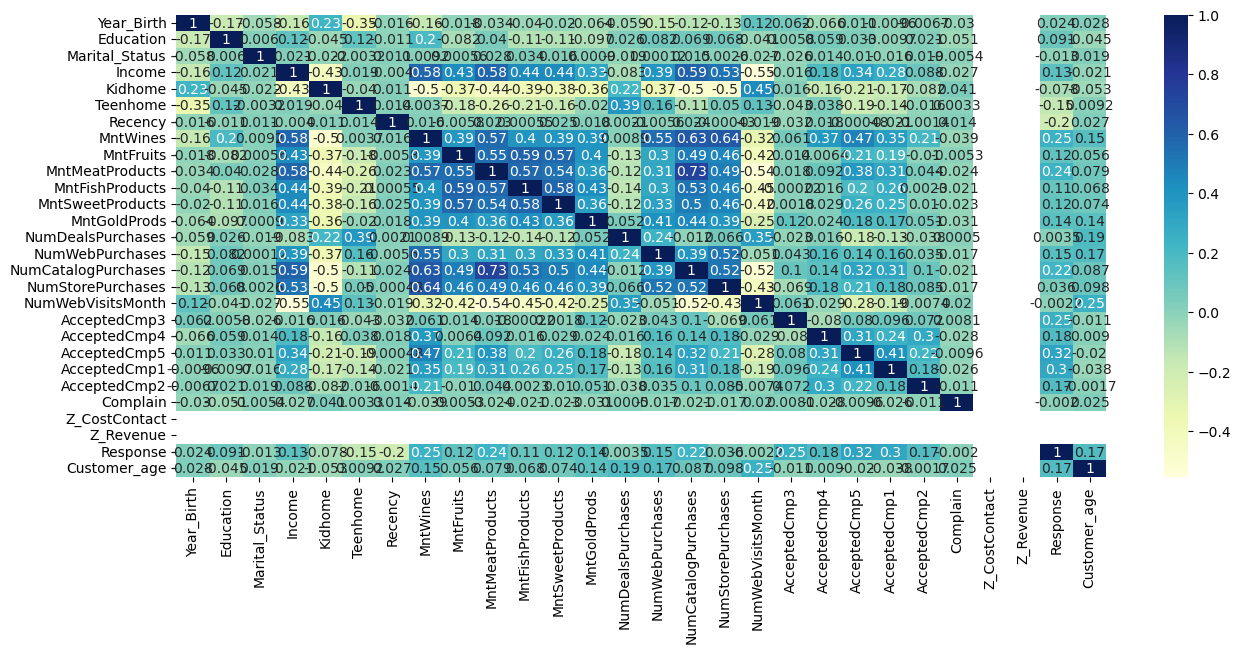

In [28]:
corr_df = df_filtered[colnames_numerics_only].corr()

fig = plt.figure(figsize = (15,6))
sns.heatmap(corr_df, cmap='YlGnBu', annot=True);

In [29]:
# Filtering constant values
# df_filtered['Z_Revenue'].value_counts(True)
# df_filtered['Z_CostContact'].value_counts(True)

# Removing Z_Revenue and Z_CostContact columns
if 'Z_Revenue' in df_filtered.columns:
    del(df_filtered['Z_Revenue'])
if 'Z_CostContact' in df_filtered.columns:  
    del(df_filtered['Z_CostContact'])


In [30]:
#  Removing Removing Z_Revenue and Z_CostContact columns from colnames_numerics_only
if 'Z_Revenue' in colnames_numerics_only:
    colnames_numerics_only.remove('Z_Revenue')
if 'Z_CostContact' in colnames_numerics_only:
    colnames_numerics_only.remove('Z_CostContact')
colnames_numerics_only

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Customer_age']

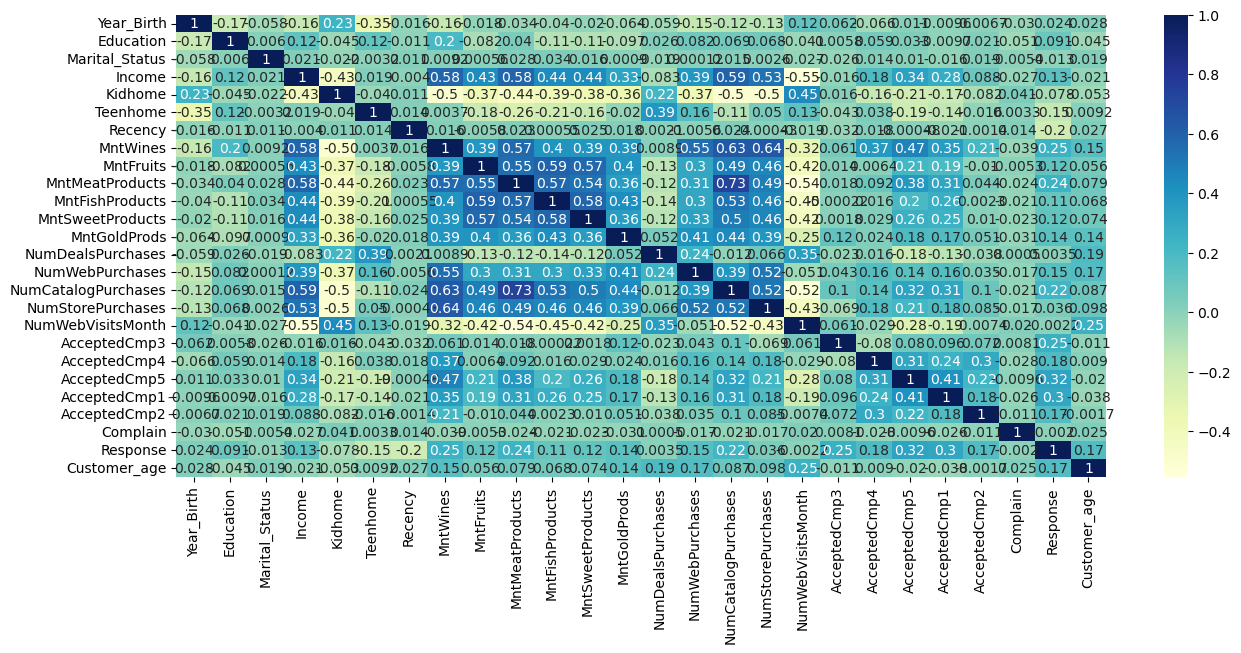

In [31]:
corr_df = df_filtered[colnames_numerics_only].corr()

fig = plt.figure(figsize = (15,6))
sns.heatmap(corr_df, cmap='YlGnBu', annot=True);

#### Observations
The higher correlation is 0.73, so I decided to keep the current columns

In [32]:
# I Standardized the values to KMeans (to be in the same scale)
sc = StandardScaler()
df_std_scr = sc.fit_transform(df_filtered[colnames_numerics_only])


In [33]:
len(colnames_numerics_only)

26

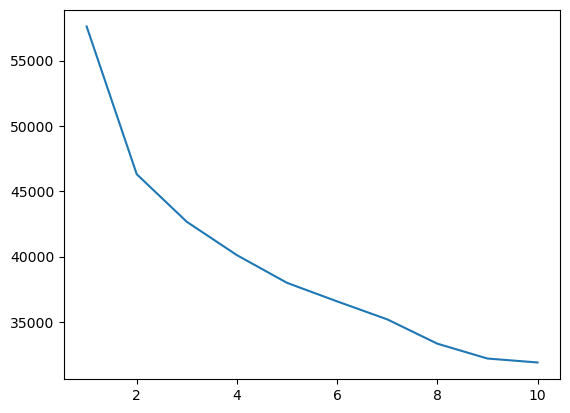

In [34]:
# Using KMeans 
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=0)
    kmeans.fit(df_std_scr)
    sse.append(kmeans.inertia_)
plt.plot(range(1,11),sse)
plt.show()

In [35]:
# Predicting the clusters
n_clusters_ = 3
kmeans_ = KMeans(n_clusters=n_clusters_, init='k-means++', max_iter=100, n_init=20, random_state=0)
labels = kmeans_.fit(df_std_scr)
y_kmeans = kmeans_.fit_predict(df_std_scr)
C = kmeans_.cluster_centers_
# C


# Cluster Representation using PCA

In [36]:
#numero de componentes
pca = PCA(n_components = 15)
df_pca = pca.fit_transform(df_std_scr)

In [37]:
#el acumulado de varianza explicada en las nuevas dimensiones
expl = pca.explained_variance_ratio_
print(expl)
print('suma',sum(expl))

[0.25196726 0.08182808 0.07403565 0.06210794 0.04577379 0.03966431
 0.03935094 0.03845792 0.03786463 0.03337756 0.03173172 0.02817393
 0.02534265 0.02351152 0.02287491]
suma 0.8360628156964475


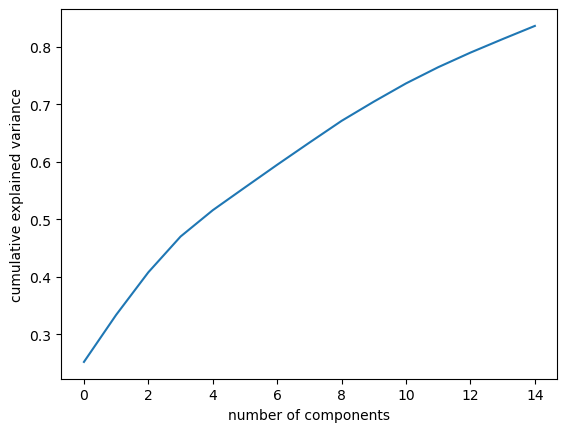

In [38]:
#graficar el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(expl))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [39]:
#numero de componentes
pca = PCA(n_components = 15)
df_pca = pca.fit_transform(df_std_scr)

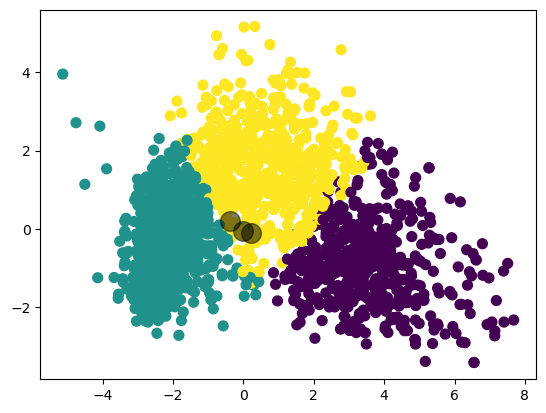

In [40]:
centers = C
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [41]:
df_filtered = df_filtered.copy()

df_filtered['labels'] = labels.labels_
df_filtered['labels'].value_counts(True)


labels
1    0.467509
2    0.287004
0    0.245487
Name: proportion, dtype: float64

In [42]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   int8          
 3   Marital_Status       2216 non-null   int8          
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [43]:
labels

KMeans(max_iter=100, n_clusters=3, n_init=20, random_state=0)

In [44]:
# plt.figure(figsize=(20,10))
# sns.scatterplot(data=df_filtered, x = "Income", y ="Teenhome")
# plt.show()

F:\Anaconda_exe\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


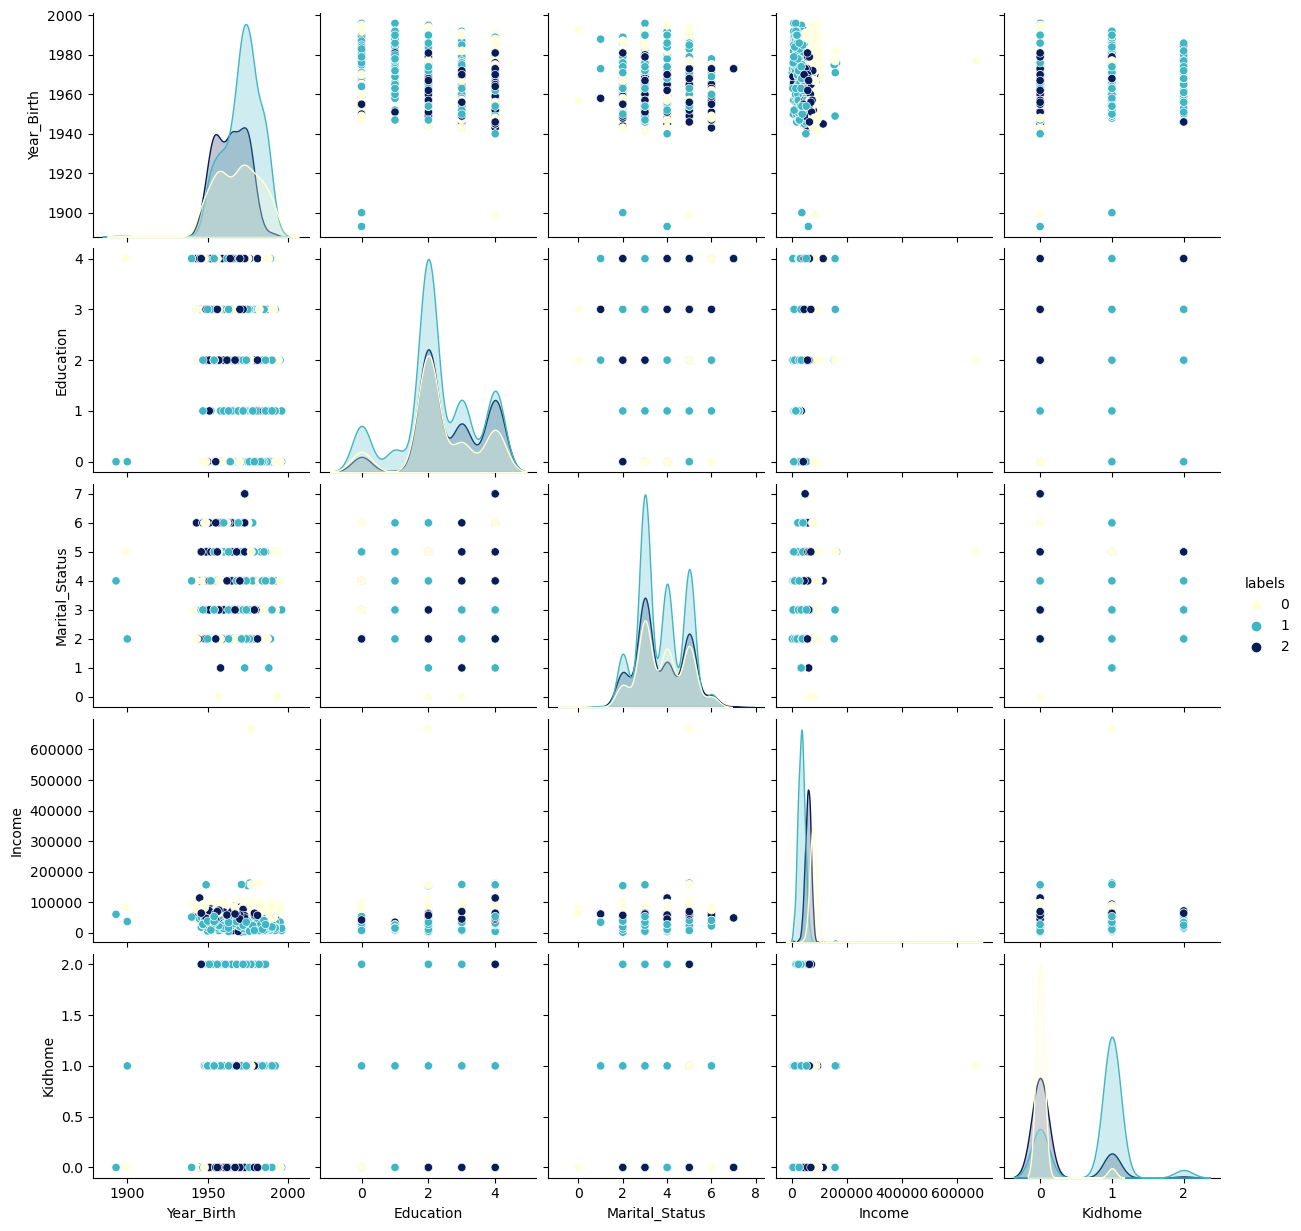

In [45]:
# Supervised Algorithms


# pair plot of sample feature
sns.pairplot(df_filtered, hue = 'labels', vars = colnames_numerics_only[:5], palette='YlGnBu' )

# Multivariate Analysis

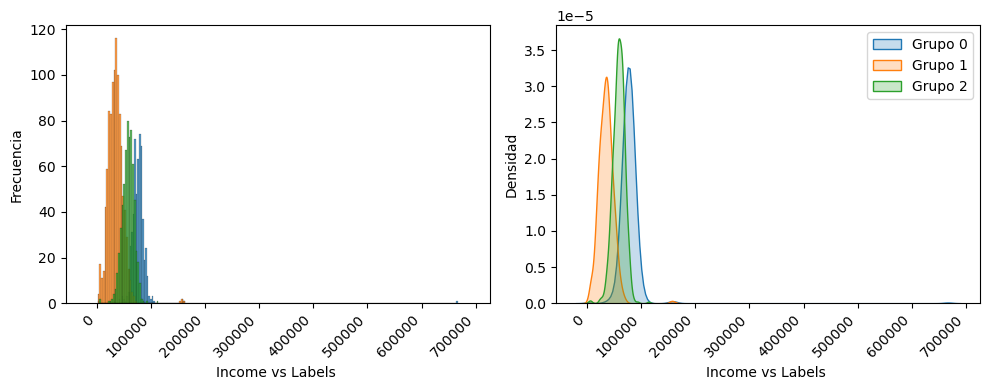

In [91]:
#Customer's yearly household income vs groups
var = 'Income'
var_title = 'Income vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

Observations: There are possible outliers because there are a little bit people making a lot of money

In [47]:
df_filtered['Income'].describe([0.75, 0.9, 0.95, 0.99])

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
50%       51381.500000
75%       68522.000000
90%       79844.000000
95%       84130.000000
99%       94458.800000
max      666666.000000
Name: Income, dtype: float64

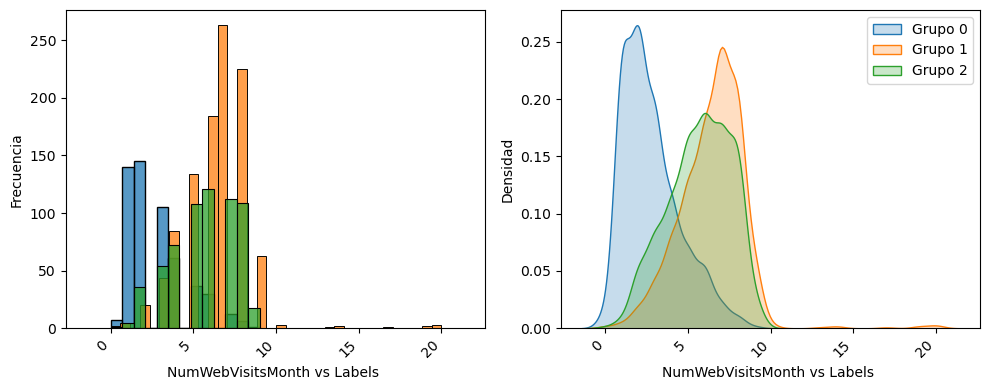

In [96]:
# NumWebVisitsMonth vs Labels
#Customer's yearly household income vs groups
var = 'NumWebVisitsMonth'
var_title = 'NumWebVisitsMonth vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

Observation: Group 0 shows less visits to the webSite


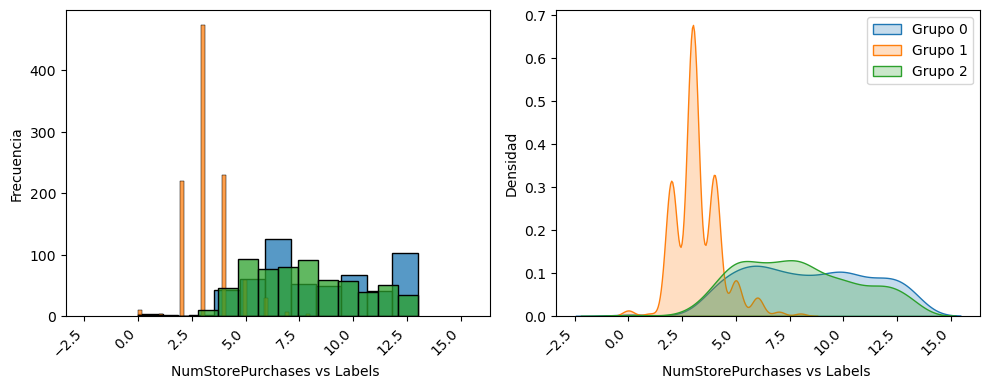

In [93]:
# NumStorePurchases vs Labels
#Customer's yearly household income vs groups
var = 'NumStorePurchases'
var_title = 'NumStorePurchases vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

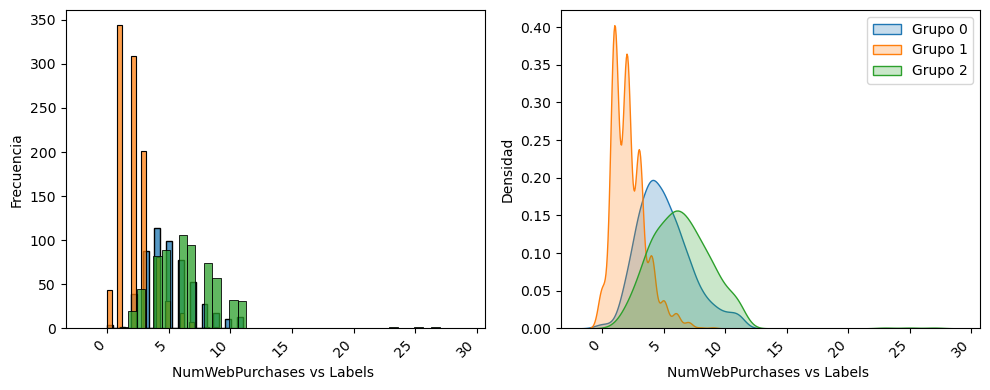

In [95]:
# NumWebPurchases vs Labels
#Customer's yearly household income vs groups
var = 'NumWebPurchases'
var_title = 'NumWebPurchases vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

Observations: Group 0 and 2 buy more than Group 1.

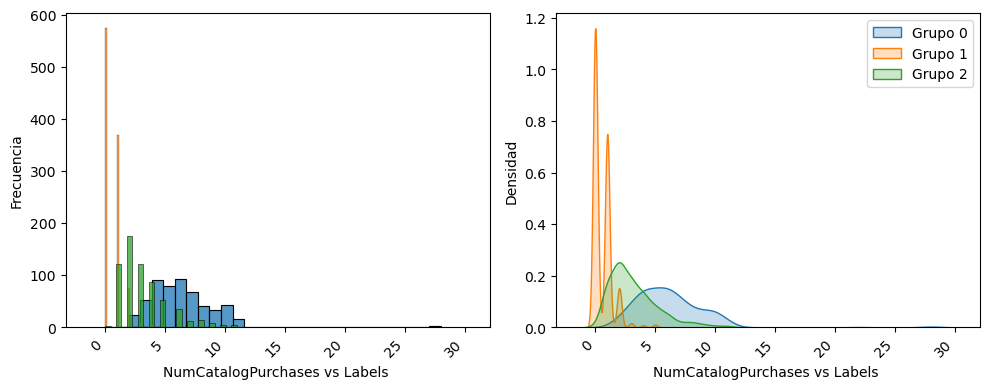

In [97]:
# NumCatalogPurchases vs Labels
#Customer's yearly household income vs groups
var = 'NumCatalogPurchases'
var_title = 'NumCatalogPurchases vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

Observations: Group 1 buy less than others


Products bought by customer

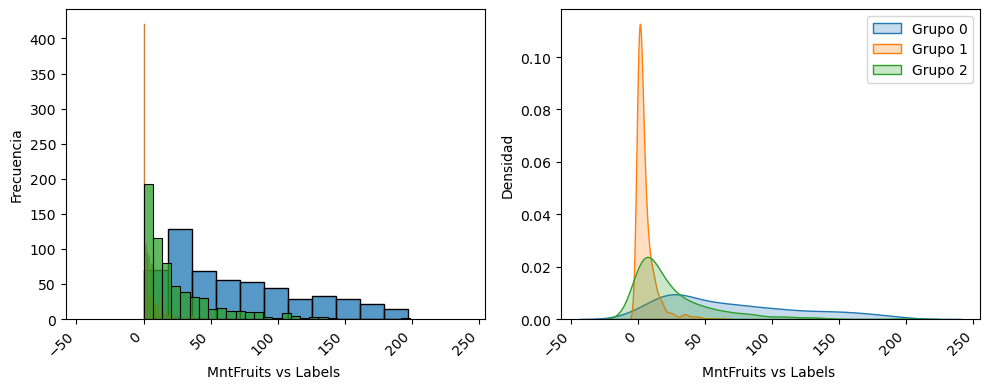

In [117]:
# MntFruits vs Labels
# MntFruits  vs groups
var = 'MntFruits'
var_title = 'MntFruits vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



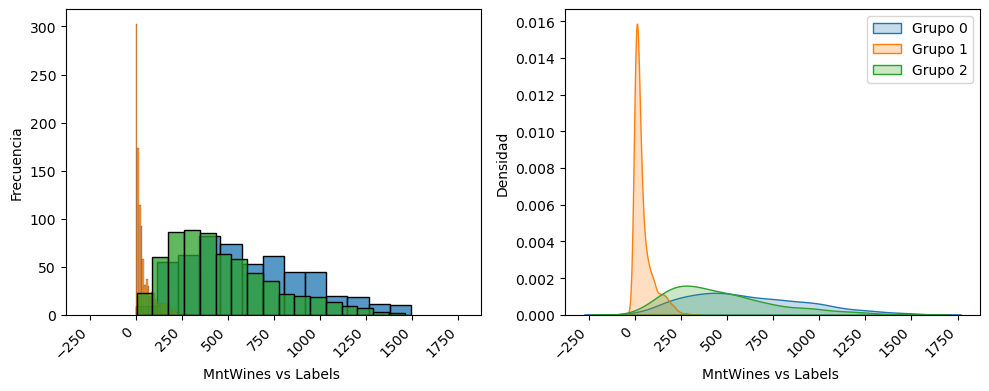

In [118]:
# MntWines vs Labels
# MntWines  vs groups
var = 'MntWines'
var_title = 'MntWines vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



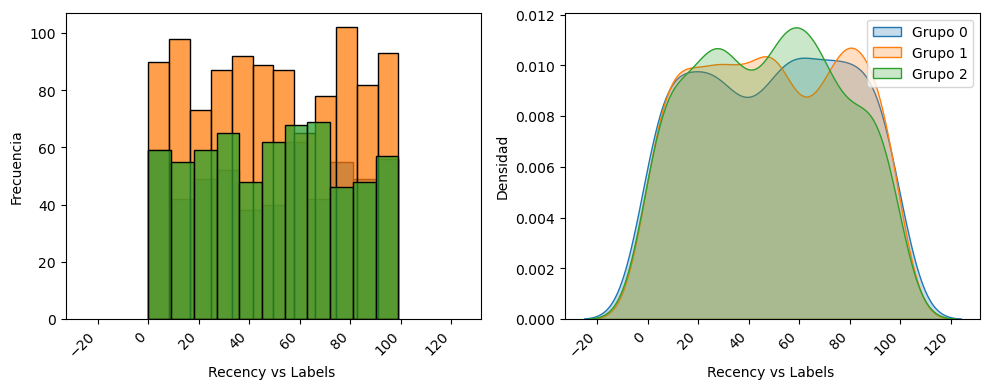

In [119]:
# Recency vs Labels
# Recency  vs groups
var = 'Recency'
var_title = 'Recency vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



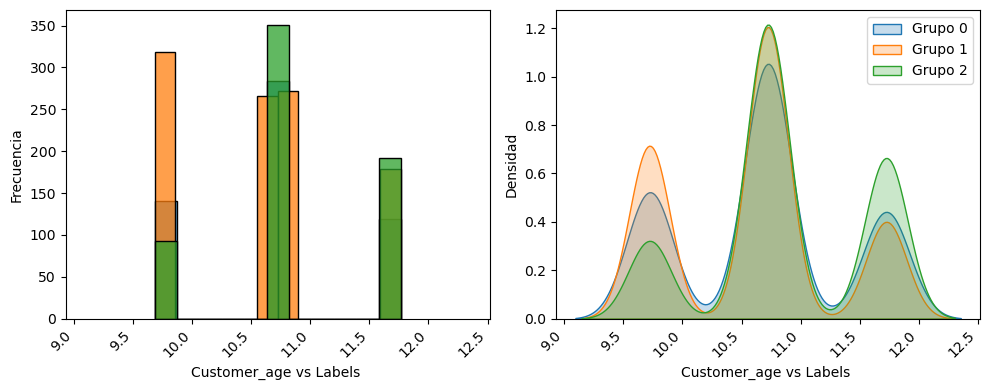

In [120]:
# Customer_age vs Labels
# Customer_age  vs groups
var = 'Customer_age'
var_title = 'Customer_age vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



People at home

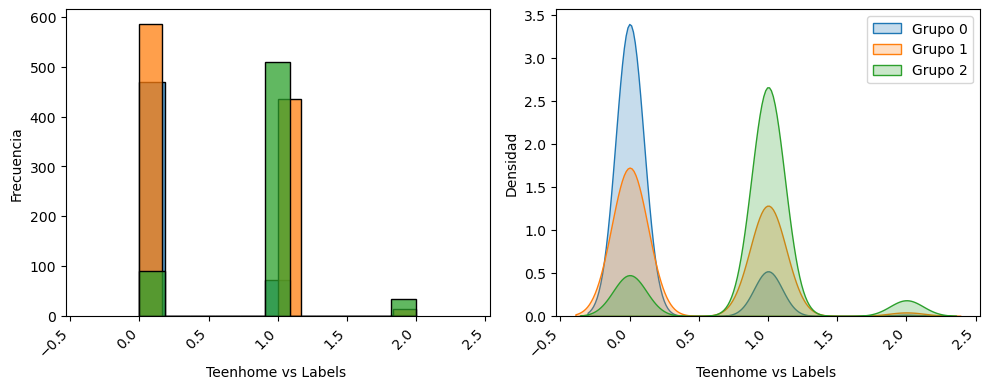

In [121]:
# Teenhome vs Labels
# Teenhome  vs groups
var = 'Teenhome'
var_title = 'Teenhome vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



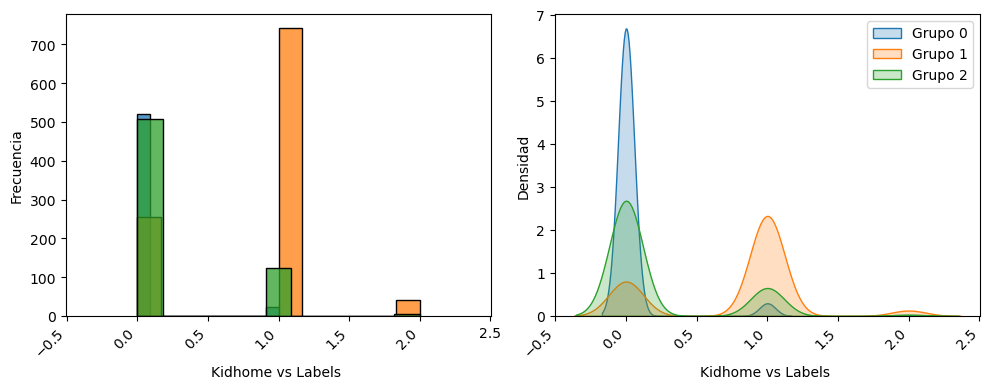

In [122]:
# Kidhome vs Labels
# Kidhome  vs groups
var = 'Kidhome'
var_title = 'Kidhome vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



Campaigns

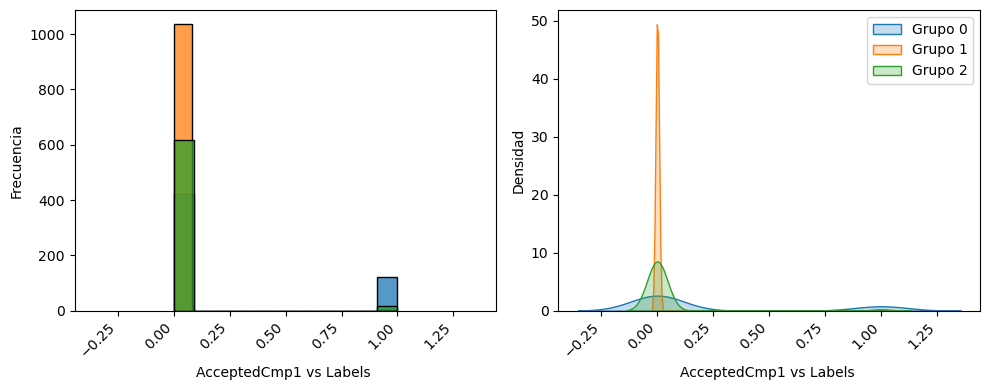

In [109]:
# AcceptedCmp1 vs Labels
# AcceptedCmp1  vs groups
var = 'AcceptedCmp1'
var_title = 'AcceptedCmp1 vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



Accepted Campaign 2

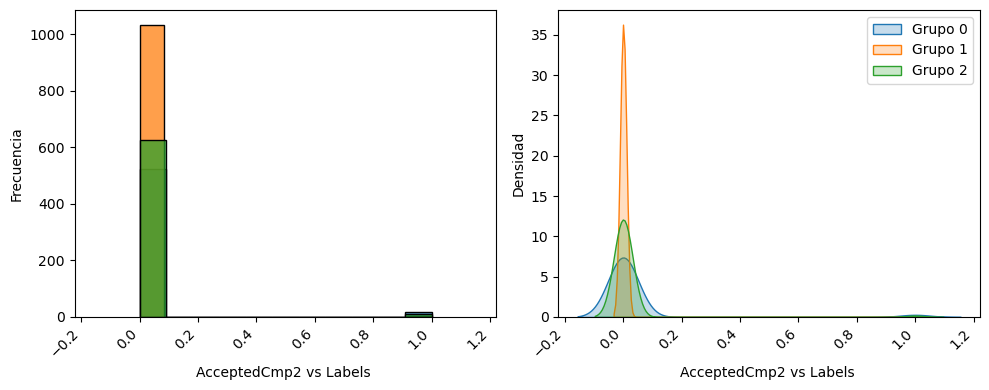

In [110]:
# AcceptedCmp2 vs Labels
# AcceptedCmp2  vs groups
var = 'AcceptedCmp2'
var_title = 'AcceptedCmp2 vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



In [ ]:
Accepted Campaign 3

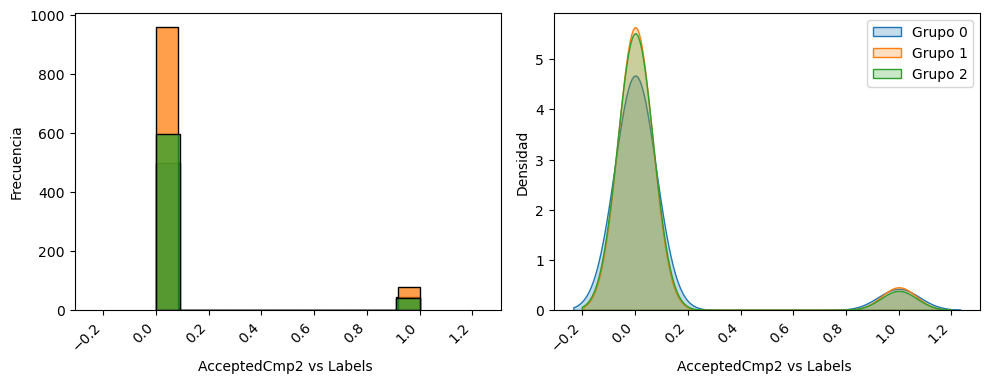

In [111]:
# AcceptedCmp3 vs Labels
# AcceptedCmp3 vs groups
var = 'AcceptedCmp3'
var_title = 'AcceptedCmp2 vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



In [ ]:
Accepted Campaign 4

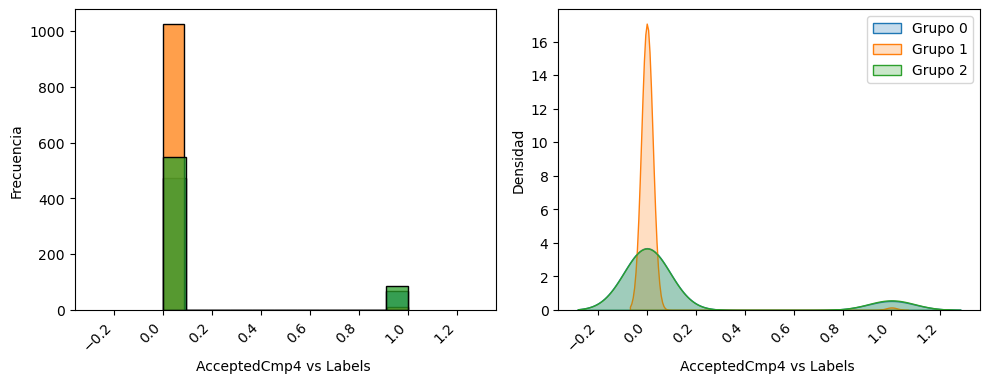

In [112]:
# AcceptedCmp4 vs Labels
# AcceptedCmp4 vs groups
var = 'AcceptedCmp4'
var_title = 'AcceptedCmp4 vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



In [ ]:
Accepted Campaign 5

C:\Users\nolve\AppData\Local\Temp\ipykernel_2260\1954696176.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])


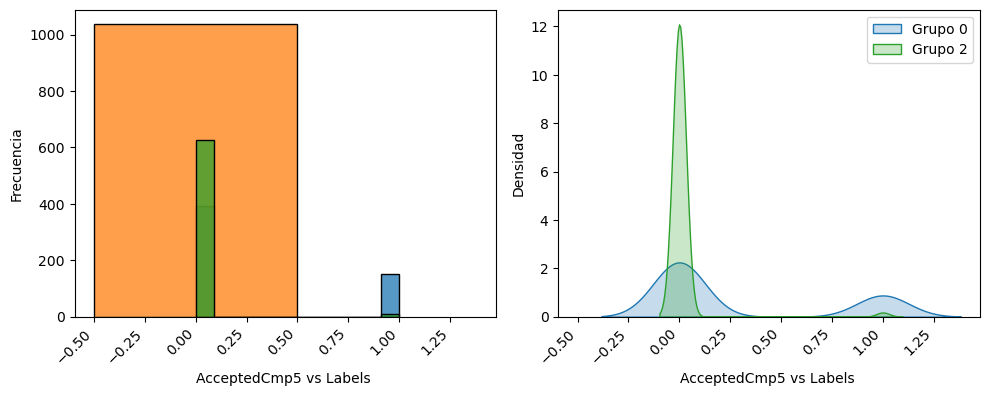

In [113]:
# AcceptedCmp5 vs Labels
# AcceptedCmp5 vs groups
var = 'AcceptedCmp5'
var_title = 'AcceptedCmp5 vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



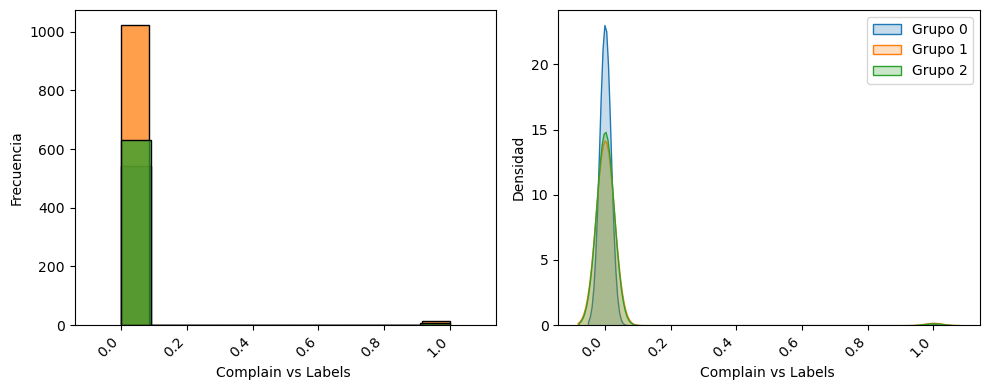

In [114]:
# Complain vs Labels
# Complain vs groups
var = 'Complain'
var_title = 'Complain vs Labels '

filter = df_filtered['labels'] == 0
df_segment_1 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 1
df_segment_2 = df_filtered.loc[filter]

filter = df_filtered['labels'] == 2
df_segment_3 = df_filtered.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Grupo 0", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Grupo 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Grupo 2", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
fig.autofmt_xdate(rotation=45)
# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Grupo 0", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Grupo 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Grupo 2", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()



# Supervised Classification Model

In [48]:
# 30% test and 70% training

# I'm stratifying, so that means we are implementing the same proportion in both: train and test
X_train, X_test, y_train, y_test = train_test_split(df_filtered, df_filtered['labels'], 
                                                    test_size=0.30, random_state = 1, 
                                                    stratify = df_filtered['labels'])
# X_train and X_test come from df_filtered
# y_train and y_test come from df_filtered['labels']

In [49]:
y_train.value_counts(True)

labels
1    0.467440
2    0.286912
0    0.245648
Name: proportion, dtype: float64

In [50]:
y_test.value_counts(True)

labels
1    0.467669
2    0.287218
0    0.245113
Name: proportion, dtype: float64

## SVM

In [98]:
# Training the model
clf_svm_model = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf_svm_model.fit(X_train[colnames_numerics_only], y_train)

SVC(kernel='linear')

In [52]:
#Predict the response (labels) for test dataset
y_pred_test = clf_svm_model.predict(X_test[colnames_numerics_only])

In [53]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred_test))

Accuracy: 0.9293233082706767


In [54]:
# Accuracy for each label (group)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       163
           1       0.97      0.95      0.96       311
           2       0.87      0.88      0.88       191

    accuracy                           0.93       665
   macro avg       0.92      0.92      0.92       665
weighted avg       0.93      0.93      0.93       665



In [55]:
# Confusion Matrix

print(confusion_matrix(y_test, y_pred_test))

[[152   0  11]
 [  0 297  14]
 [ 14   8 169]]


In [56]:
y_test.value_counts()

labels
1    311
2    191
0    163
Name: count, dtype: int64

In [99]:
len(y_test)

665

In [57]:
y_pred_train = clf_svm_model.predict(X_train[colnames_numerics_only])

In [58]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_train, y_pred_train))

Accuracy: 0.938749194068343


In [59]:
print(classification_report(y_train, y_pred_train))
# precision: Ability of a model to identify only the relevant data points 
# precision = True_positives /  elements_classified_as_possitive_from_model
# recall: Ability of a model to find all relevant cases
# recall = True_positives / all_possitive_elements

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       381
           1       0.98      0.97      0.98       725
           2       0.90      0.89      0.89       445

    accuracy                           0.94      1551
   macro avg       0.93      0.93      0.93      1551
weighted avg       0.94      0.94      0.94      1551



In [60]:
import pickle
# Saving the SVM Model
# Save the model as customer_personality_svm_model.pkl
with open('customer_personality_svm_model.pkl', 'wb') as fp:
    pickle.dump(clf_svm_model, fp)

In [61]:
# Read the model
with open('customer_personality_svm_model.pkl', 'rb') as fp:
    rd_svm_model = pickle.load(fp)

In [62]:
#Predict the response for test dataset using the saved model
y_pred_test_svm_model = rd_svm_model.predict(X_test[colnames_numerics_only]) 


In [63]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred_test_svm_model))

Accuracy: 0.9293233082706767


In [64]:
# Saving colnames_numerics_only
with open('colnames_numerics_only', 'wb') as fp:
    pickle.dump(colnames_numerics_only, fp)

In [65]:
import pickle
# Read the columnlist of dataframe
with open('colnames_numerics_only', 'rb') as fp:
    colnames_numerics_only_read = pickle.load(fp)

In [66]:
colnames_numerics_only_read

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Customer_age']

## Decision Tree Model

In [67]:
# Create Decision Tree Model "GINI"
clf_dtree_model = DecisionTreeClassifier()

In [68]:
# Entrenar el modelo con los datos de entrenamiento
clf_dtree_model.fit(X_train[colnames_numerics_only], y_train)
# Realizar predicciones en los datos de prueba
y_pred_test_dt = clf_dtree_model.predict(X_test[colnames_numerics_only])

In [69]:
# Calcular la precisión del modelo
# y_test is the original
accuracy = accuracy_score(y_test, y_pred_test_dt)
print("Precisión:", accuracy)

Precisión: 0.9172932330827067


In [70]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       163
           1       0.96      0.95      0.95       311
           2       0.86      0.86      0.86       191

    accuracy                           0.92       665
   macro avg       0.91      0.91      0.91       665
weighted avg       0.92      0.92      0.92       665



In [71]:
# Realizar predicciones en los datos de entrenamiento
y_pred_train_dt = clf_dtree_model.predict(X_train[colnames_numerics_only])

In [72]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_train, y_pred_train_dt)
print("Precisión:", accuracy)

Precisión: 1.0


In [73]:
# Saving the SVM Model
# Save the model as customer_personality_svm_model.pkl
with open('customer_personality_dtree_model.pkl', 'wb') as fp:
    pickle.dump(clf_dtree_model, fp)

In [74]:
# Read the columnlist of dataframe
with open('customer_personality_dtree_model.pkl', 'rb') as fp:
    rd_dtree_model = pickle.load(fp)

In [75]:
rd_dtree_model

DecisionTreeClassifier()

In [76]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [77]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import sys
!{sys.executable} -m pip install graphviz


In [78]:
 pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [79]:
# Saving df_filtered
df_filtered.info()
df_filtered.to_csv('df_filtered.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   int8          
 3   Marital_Status       2216 non-null   int8          
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

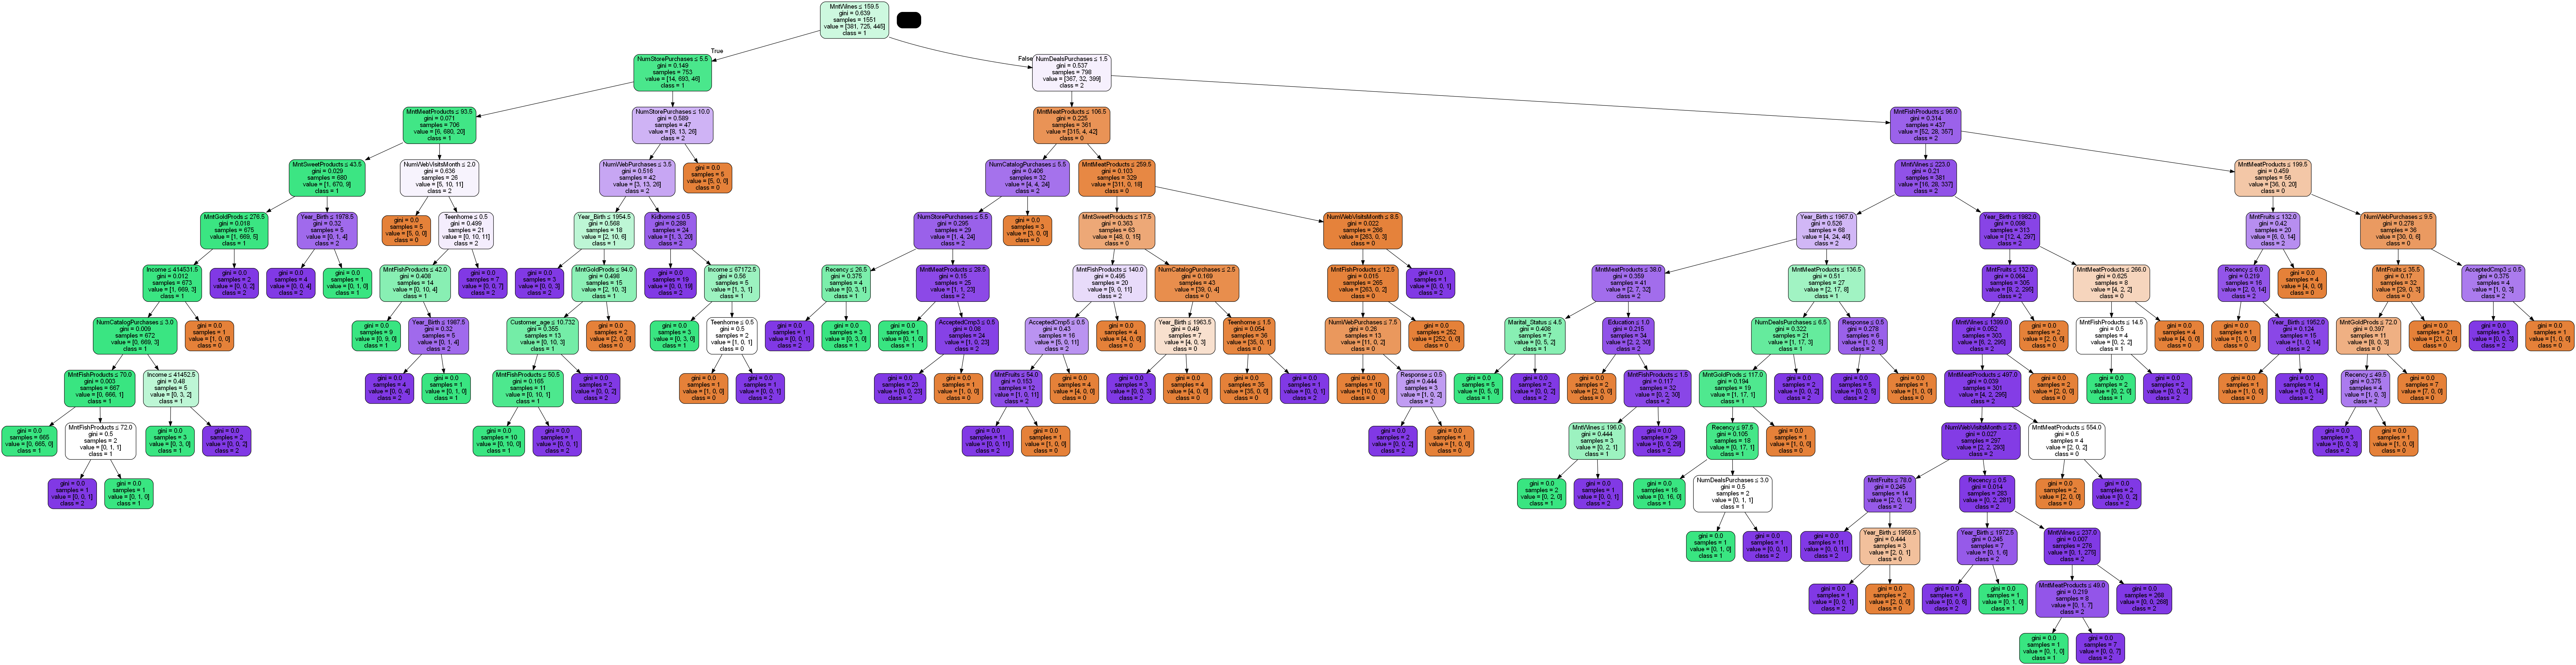

In [80]:
# instalar el compoent graphviz: https://graphviz.gitlab.io/download/
dot_data = StringIO()
export_graphviz(rd_dtree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = colnames_numerics_only_read,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('customer_client.png')
Image(graph.create_png())

In [81]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.3
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0




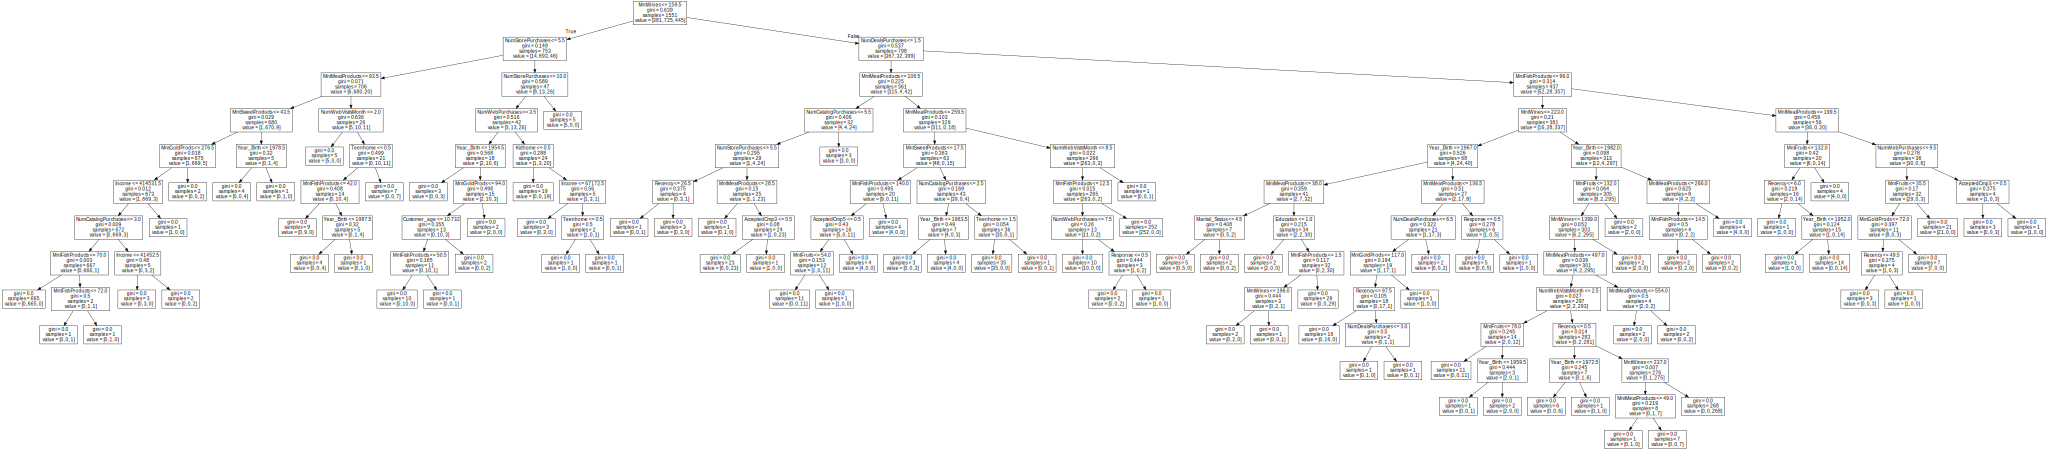

In [82]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(rd_dtree_model, out_file=None, feature_names=colnames_numerics_only_read))

So, I decided to use SVM to classify the customers because the accuracy is similar in test and train predictions


Another Observations

Multivariate Analysis can help me to remove outliers